Predictions: [0 1 1 0]


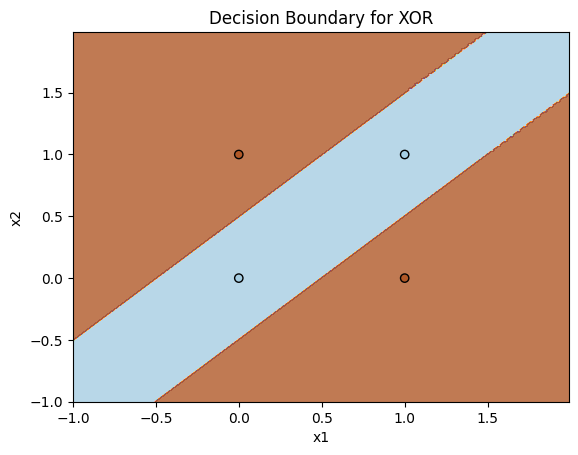

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the XOR MLP
class XOR_MLP:
    def __init__(self):
        # Weights for hidden layer (AND gates)
        self.hidden_weights = np.array([[1, -1], [-1, 1]])  # AND and NAND
        self.hidden_bias = np.array([-0.5, -0.5])
        
        # Weights for output layer (OR gate)
        self.output_weights = np.array([1, 1])
        self.output_bias = -0.5

    def activation(self, x):
        return np.where(x > 0, 1, 0)  # Step activation function

    def predict(self, X):
        # Hidden layer
        hidden_input = np.dot(X, self.hidden_weights.T) + self.hidden_bias
        hidden_output = self.activation(hidden_input)
        
        # Output layer
        output_input = np.dot(hidden_output, self.output_weights) + self.output_bias
        output = self.activation(output_input)
        return output

# XOR dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

# Train and predict using the XOR MLP
xor_mlp = XOR_MLP()
y_pred = xor_mlp.predict(X)

print("Predictions:", y_pred)

# Plot the decision boundary
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k", cmap=plt.cm.Paired)
    plt.title("Decision Boundary for XOR")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.show()

plot_decision_boundary(xor_mlp, X, y)
